In [1]:
import nb_utils

Moving cwd to /store/CIA/js2164/repos/diffusion/score_sde_pytorch


In [47]:
import os
import run_lib
from dim_reduction import get_manifold_dimension
from configs.utils import read_config
std = 0.75
config = read_config(f'logs/ksphere/n_1/dim_10/random_isometry/non_uniform_{std}/config.pkl')
config.model.checkpoint_path = f'logs/ksphere/n_1/dim_10/random_isometry/non_uniform_{std}/checkpoints/best/last.ckpt'
svd = get_manifold_dimension(config = config, name='svd', return_svd=True)

Lightning automatically upgraded your loaded checkpoint from v1.5.1 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file logs/ksphere/n_1/dim_10/random_isometry/non_uniform_0.75/checkpoints/best/last.ckpt`
100%|█████████▉| 999/1000 [01:01<00:00, 16.13it/s]


Aggregation mode: all


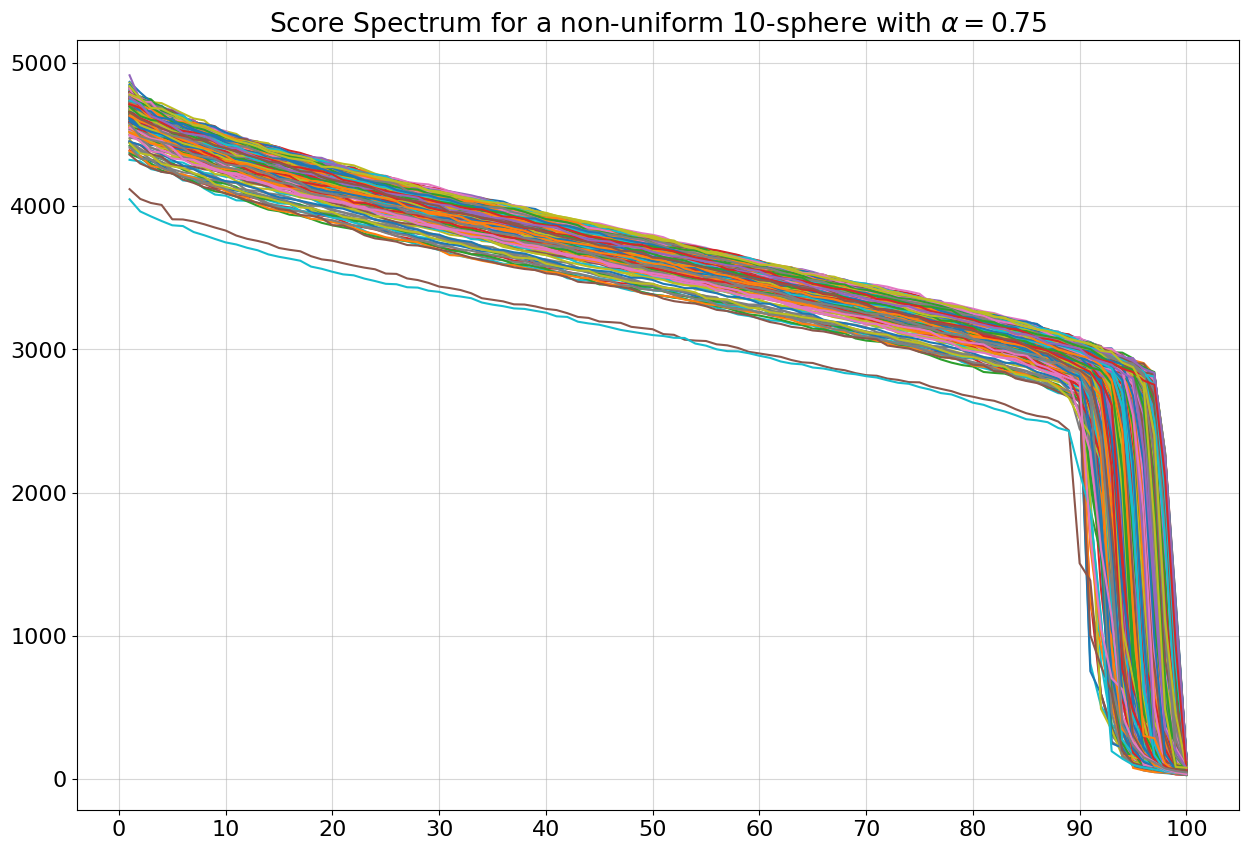

In [48]:
from plot_utils import plot_spectrum, plot_distribution, plot_dims
fig = plot_spectrum(svd, mode='all', title=f'Score Spectrum for a non-uniform 10-sphere with $\\alpha={std}$')

Aggregation mode: all


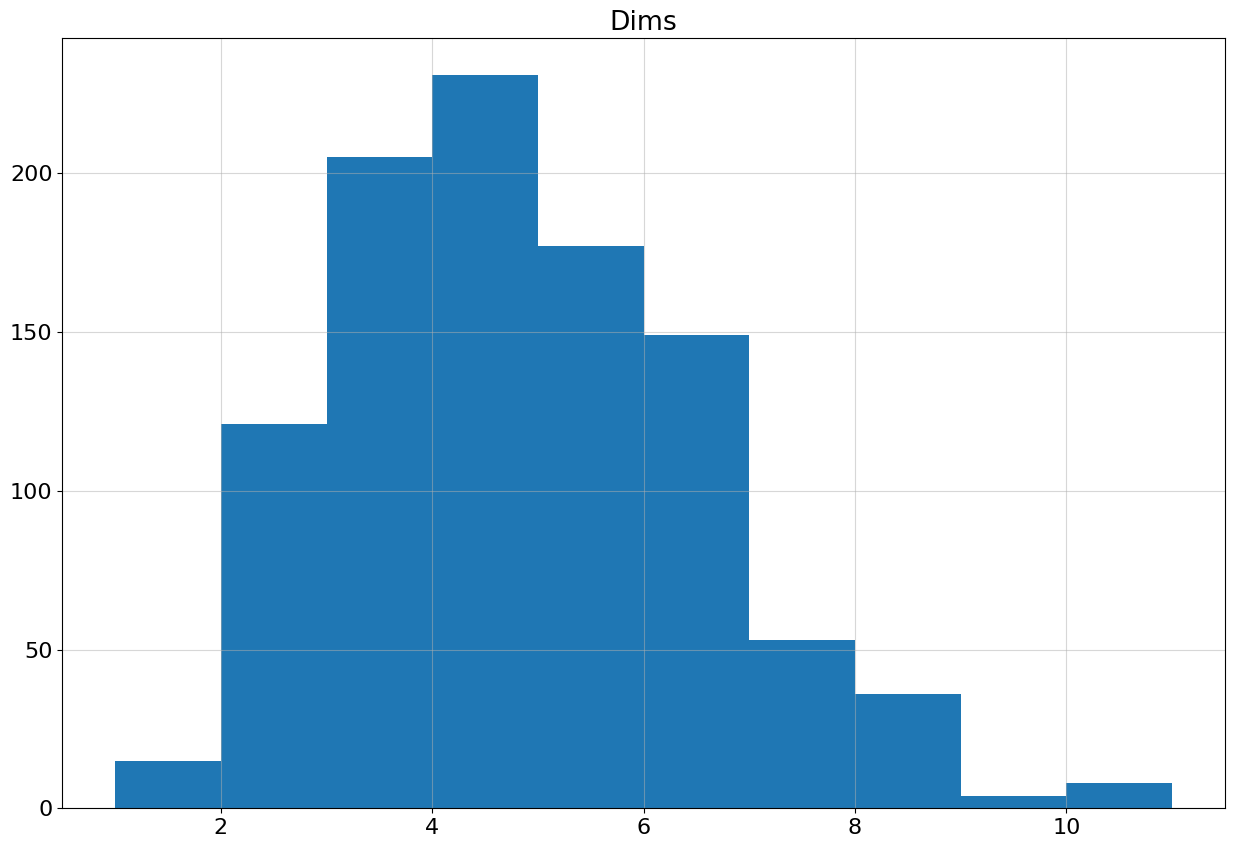

In [49]:
dims = plot_dims(svd)

In [50]:
# print min and max dims
import numpy as np
dims = np.array(dims)
print('min dim: ', dims.min())
print('max dim: ', dims.max())

min dim:  1
max dim:  11


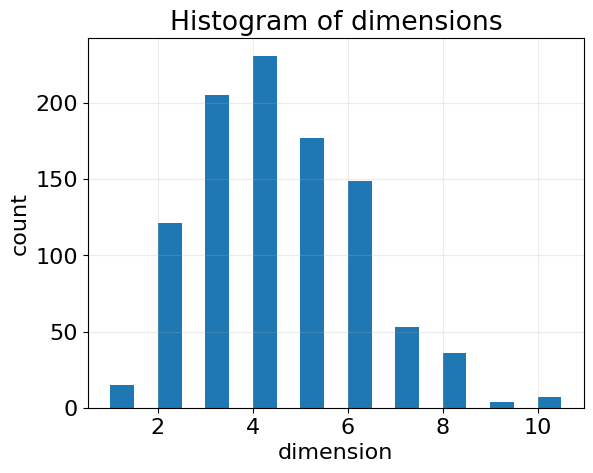

In [51]:
#plot histogram of dims using pyplot
import matplotlib.pyplot as plt
#plt.hist(dims, bins=[1,2,3,4,5,6,7,8,9,10,11])
#make bins more narrow
plt.hist(dims, bins=np.arange(1,11,0.5))
plt.xlabel('dimension')
plt.ylabel('count')
plt.title('Histogram of dimensions')
plt.grid(True, alpha=0.25)
plt.show()
